# Sentence Transformers  

This notebook demonstrates the use of sentence transformers in various applications, including:  
- Question-answering  
- Sentiment analysis of tweets, social media posts, etc.  
- Image classification  

Sentence transformers are versatile and can also be applied in tasks like sentence completion, mapping images or audio to text, and more.  

## Libraries/packages used

The following libraries are used in this notebook:

* [<code style="color:blue;">transformers:</code>](https://huggingface.co/docs/transformers/index)  A library by Hugging Face offering pretrained models for NLP tasks like text classification, sentiment analysis, and tokenization  

* [<code style="color:blue;">sentence_transformers:</code>](https://pypi.org/project/sentence-transformers/#description)  Provides tools to generate embeddings for sentences, enabling tasks like semantic similarity, clustering, and question-answering

* [<code style="color:blue;">scikit-learn:</code>](https://scikit-learn.org/) A machine learning library for Python, offering tools for data preprocessing, metrics like cosine similarity, and other utilities 

* [<code style="color:blue;">matplotlib:</code>](https://matplotlib.org/) A plotting library for creating static, animated, and interactive visualizations in Python  

* [<code style="color:blue;">pillow (PIL):</code>](https://pillow.readthedocs.io/) A Python library for working with images, including opening, editing, and saving image files 

* [<code style="color:blue;">warnings:</code>](https://docs.python.org/3/library/warnings.html)A library used for suppressing warnings  

* [<code style="color:blue;">requests:</code>](https://docs.python-requests.org/en/latest/) - A library for making HTTP requests

The packages mentioned above are already installed on the learning portal to run this exercise. If you would like to run this code on your local machine, please run the following commands in your command line tool. 
* `pip install transformers`
* `pip install sentence-transformers`
* `pip install scikit-learn`
* `pip install matplotlib`
* `pip install pillow`
* `pip install requests`

In [1]:
!pip install transformers

  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 39.9 MB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 564.3/564.3 kB 48.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 40.9 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 802.0/802.0 kB 22.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 37.8 MB/s eta 0:00:00
Using cached tqdm-4.67.1-py3-none-any.whl (78 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 34.4 MB/s eta 0:00:00

[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: pip install --upgrade pip


In [2]:
!pip install sentence-transformers

  Using cached pillow-11.3.0-cp312-cp312-manylinux_2_27_x86_64.manylinux_2_28_x86_64.whl.metadata (9.0 kB)
  Using cached sympy-1.14.0-py3-none-any.whl.metadata (12 kB)
  Using cached networkx-3.5-py3-none-any.whl.metadata (6.3 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
  Using cached mpmath-1.3.0-py3-none-any.whl.metadata (8.6 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 887.9/887.9 MB 41.4 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 594.3/594.3 MB 42.5 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 42.5 MB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.0/88.0 MB 44.7 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 954.8/954.8 kB 35.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 706.8/706.8 MB 42.1 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.1/193.1 MB 44.8 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━

In [3]:
!pip install --upgrade torch


[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: pip install --upgrade pip


In [4]:
!pip install --upgrade transformers


[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: pip install --upgrade pip


<a id='TOC'></a>  
## Table of contents  

1. <a href="#qa">Question-answering</a><br>  
2. <a href="#sentiment">Sentiment analysis of tweets</a><br>  
3. <a href="#images">Image classification</a><br>  


<a id='qa'></a>  
## 1. Question-answering  
[Back to table of contents](#TOC)  

This section demonstrates how to use a pretrained transformer for generating embeddings that are semantically similar for questions and answers.  
After that we will be checking similarity fo the generated embeddings using cosine similarity to test if the transformer was able to generate embeddings that are related as per answers of correct questions.

* [<code style="color:blue;">encode</code>](https://www.sbert.net/docs/usage/semantic_textual_similarity.html#encoding-sentences)  
* [<code style="color:blue;">cosine_similarity</code>](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise.cosine_similarity.html)  

In [5]:
# import necessary module 
import warnings
warnings.filterwarnings("ignore")

# defining question-answer pairs
questions = [
    "What is your name?",
    "What is the mean incubation period for Covid 19?",
    "Is India also called Indian Subcontinent?",
    "My neighbor is usually home around 7pm, can you determine if he will be at home at the moment?"
]
answers = [
    "India is often referred as Indian Subcontinent.",
    "My name is Pralay.",
    "At the moment clock is ticking at 6 pm cst, so your neighbor will not be available at home.",
    "The mean incubation period of covid is 4 to 6 days."
]

In [6]:
# import necessary modules
from sentence_transformers import SentenceTransformer  
from sklearn.metrics.pairwise import cosine_similarity  

# load a pretrained transformer model ,we will be using it for generating embeddings
model = SentenceTransformer('all-MiniLM-L6-v2')  # https://www.sbert.net/docs/pretrained_models.html

# generate embeddings for questions and answers
question_embeddings = model.encode(questions)
answer_embeddings = model.encode(answers)

In [8]:
# function to compute similarity between a question and all answers
def find_most_similar_answer(question_embedding):
    similarities = cosine_similarity(question_embedding.reshape(1,-1), answer_embeddings)
    print("Similarity scores : ",similarities)
    most_similar_index = similarities.argmax()
    return answers[most_similar_index]

In [9]:
# testing the model
ans = find_most_similar_answer(question_embeddings[0])  # match for the first question
print("Answer:", ans)

Similarity scores :  [[ 0.09153172  0.5972103   0.03586209 -0.01179911]]
Answer: My name is Pralay.


If you look at the list of similarity score it is very clear that the highest similarity for "What is your name?" exists with "My name is Pralay."*

<a id='sentiment'></a>  
## 2. Sentiment analysis of tweets  
[Back to table of contents](#TOC)  

This section uses the RoBERTa-base model trained on ~124M tweets to classify sentiments as positive, neutral, or negative.  

* [<code style="color:blue;">AutoTokenizer</code>](https://huggingface.co/docs/transformers/v4.48.0/en/model_doc/auto#transformers.AutoTokenizer)  
* [<code style="color:blue;">AutoModelForSequenceClassification</code>](https://huggingface.co/docs/transformers/model_doc/auto#transformers.AutoModelForSequenceClassification)  
* [<code style="color:blue;">Hugging Face RoBERTa</code>](https://huggingface.co/docs/transformers/model_doc/roberta)  

In [10]:
# import necessary classes
from transformers import AutoTokenizer, AutoModelForSequenceClassification  

# load tokenizer and model for sentiment analysis
tokenizer = AutoTokenizer.from_pretrained("cardiffnlp/twitter-roberta-base-sentiment-latest")  
model = AutoModelForSequenceClassification.from_pretrained("cardiffnlp/twitter-roberta-base-sentiment-latest")  

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [11]:
# list of tweets for sentimental analysis
tweets = [
    # positive tweets
    "Absolutely in love with my new job!",
    "Just had the best day ever with family and friends.",
    "Feeling grateful for all the good in my life right now.",
    "This weather is fantastic!",
    # neutral tweets
    "Heading to the store to buy groceries.",
    "Just another regular day at work.",
    "Thinking about what to cook for dinner tonight.",
    # negative tweets
    "Missed my bus and it’s raining. What a awful day!",
    "This weather is depressing.",
    "Why is customer service always so complicated?"
]

In [12]:
# tokenize the tweets
tweet_tokens = tokenizer(tweets, max_length=256, padding='max_length', truncation=True, return_tensors='pt')

In [13]:
# process the tweets through the model
tweets_scoring = model(**tweet_tokens) 

In [14]:
# define sentiment labels
nature_list = ["Negative","Neutral","Positive"]

# scores for each tweet and their nature as per score
print("Classification of sentiments: \n")
for x in range(len(tweets)):
    print(f'Tweet {x+1} : ' + tweets[x])
    score_array = tweets_scoring[0][x].detach().numpy()
    nature_index = score_array.argmax()
    print("Nature: " + nature_list[nature_index])
    print("\n")

Classification of sentiments: 

Tweet 1 : Absolutely in love with my new job!
Nature: Positive


Tweet 2 : Just had the best day ever with family and friends.
Nature: Positive


Tweet 3 : Feeling grateful for all the good in my life right now.
Nature: Positive


Tweet 4 : This weather is fantastic!
Nature: Positive


Tweet 5 : Heading to the store to buy groceries.
Nature: Neutral


Tweet 6 : Just another regular day at work.
Nature: Neutral


Tweet 7 : Thinking about what to cook for dinner tonight.
Nature: Neutral


Tweet 8 : Missed my bus and it’s raining. What a awful day!
Nature: Negative


Tweet 9 : This weather is depressing.
Nature: Negative


Tweet 10 : Why is customer service always so complicated?
Nature: Negative




Notice how effectively the model was able to classify a tweet as positive, negative or neutral.
Try out the above examples yourself by providing a complex set of tweets having tweets of mixed nature to test the capability of model.

<a id='images'></a>  
## 3. Image classification  
[Back to table of contents](#TOC)  

This section uses the CLIP model to match images with captions.  
 
* [<code style="color:blue;">Image</code>](https://pillow.readthedocs.io/en/stable/reference/Image.html) 

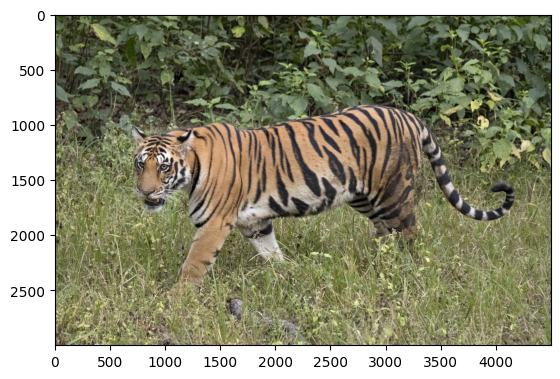

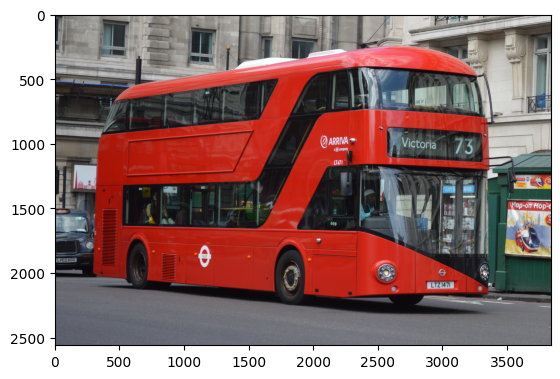

In [17]:
# import necessary modules  
from matplotlib import pyplot as plt  
import numpy as np  
from PIL import Image  
import requests  

# list of image urls  
urls = [
      "resources/Bengal_tiger.jpg",
      "resources/Arriva_London.jpg"
]

# open the images from the urls  
images = [  
    Image.open(url) for url in urls  
]  

# display each image using matplotlib  
for image in images:  
    plt.show(plt.imshow(np.asarray(image)))  

* [<code style="color:blue;">CLIPProcessor</code>](https://huggingface.co/docs/transformers/model_doc/clip#transformers.CLIPProcessor)  
* [<code style="color:blue;">CLIPModel</code>](https://huggingface.co/docs/transformers/model_doc/clip#transformers.CLIPModel) 

In [18]:
# import necessary libraries
from transformers import CLIPProcessor, CLIPModel  

# load the CLIP model and processor
model = CLIPModel.from_pretrained('openai/clip-vit-base-patch32')  
processor = CLIPProcessor.from_pretrained('openai/clip-vit-base-patch32')  

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


In [19]:
# define captions for matching
captions = ["a red car", "race of horses", "a dog running"]

# process the inputs
inputs = processor(text=captions, images=images, return_tensors='pt', padding=True)

# compute probabilities for matching
outputs = model(**inputs)
probs = outputs.logits_per_image.argmax(dim=1)
print("Probabilities of matching : ",probs)

Probabilities of matching :  tensor([2, 0])


Image 1: a dog running


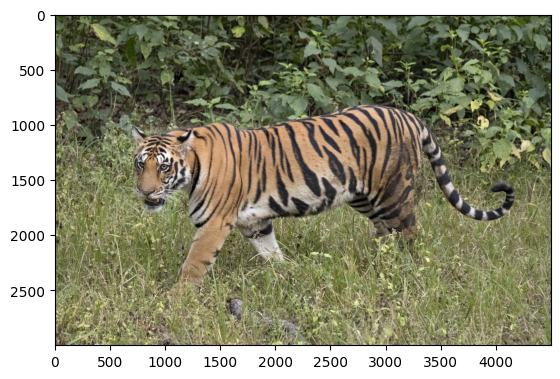

Image 2: a red car


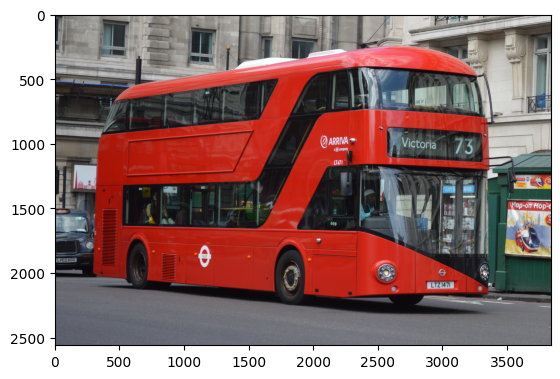

In [20]:
# map most similar captions to images
for i, image in enumerate(images):
    argmax = probs[i].item()
    print(f"Image {i + 1}: {captions[argmax]}")
    plt.imshow(np.asarray(image))
    plt.show()